In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt


In [2]:
# Create an imbalanced dataset (only 10% positives)
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_classes=2, weights=[0.9, 0.1], 
                           random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Get prediction scores (not binary predictions)
y_scores = model.predict_proba(X_test)[:, 1]


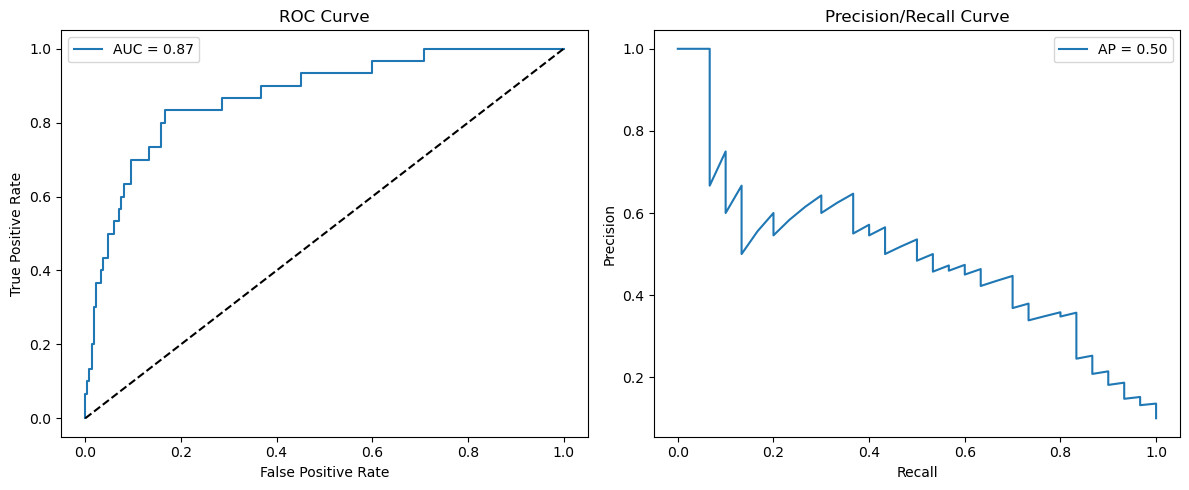

In [4]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Precision/Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = average_precision_score(y_test, y_scores)

# Plotting
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AP = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision/Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()
